# Comparison with real time data

Lets take this to the next level - we will train a model and then use it to try and predict the current taxi availability.

In [1]:
from sgtaxidata import *
from sklearn.ensemble import *
import numpy as np
from datetime import datetime
import time


DBNAME="../taxis_large.db"

holidays=['20170626']
def peak(h,m,w):
    return 1 if ((w==1 and (h>=6 and (h <=9 and m<30)) or (h >= 18))) else 0

def weekday(d):
    dt=datetime.strptime(d,"%Y%m%d")
    return 1 if datetime.isoweekday(dt)<6 else 0

In [2]:
lat,lon = utils.get_lat_long("Serangoon")
dates=taxis.get_dates(DBNAME)
data=[analysis.get_weekday_data(date,DBNAME,lat,lon,holidays=holidays) for date in dates]
data=[x for x in data if x is not None]

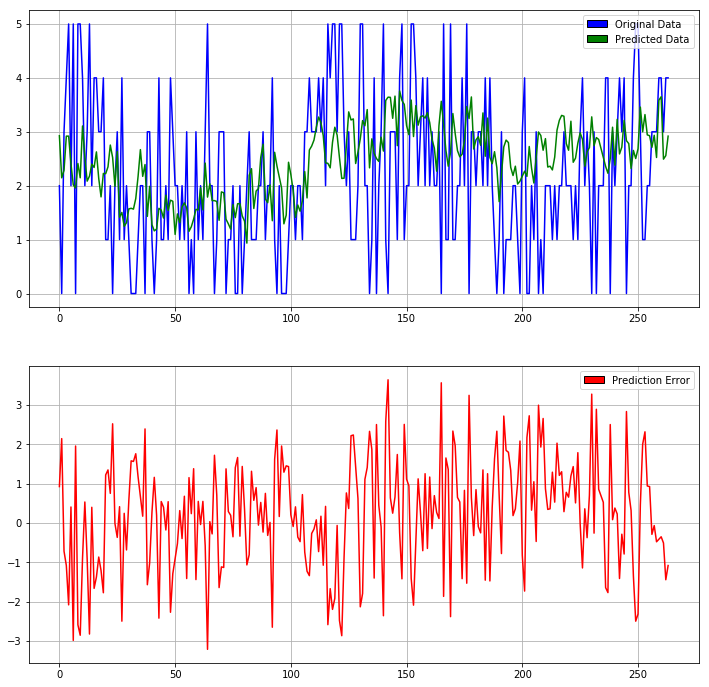

In [3]:
rf=RandomForestRegressor(n_estimators=100,n_jobs=10,warm_start=True)
for df in data[:-1]:
    X=df.drop(['TaxiCount','PeakHour'],axis=1)
    y=np.array(df['TaxiCount'])
    rf.fit(X,y.ravel())
    rf.n_estimators+=20

test=data[-1]

Xt=test.drop(['TaxiCount','PeakHour'],axis=1)
yt=np.array(test['TaxiCount'])

visualize.plot_model(Xt,yt,rf)

In [6]:
h=30
grid=utils.create_grid(h)
d=utils.get_taxi_data()
points=d['features'][0]['geometry']['coordinates']
for b,a in points:
    i,j=utils.get_grid_cell(a,b,h)
    grid[j][i]+=1

i,j=utils.get_grid_cell(lat,lon)
n=datetime.now()
h=n.hour
m=int(5 * round(float(n.minute)/5))
p=1 if datetime.isoweekday(n)<6 else 0
X=np.array([h,m]).reshape(1,-1)
print "Predicted ",rf.predict(X)[0]
print "Actual ",grid[j][i]

Predicted  3.17307692308
Actual  0
